In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv('customer_behavior_analytcis.csv')

In [41]:
#first few rows of the dataset
print(data.head())


   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [42]:
# Check for missing values
print(data.isnull().sum())

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [43]:
# Summary statistics
print(data.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


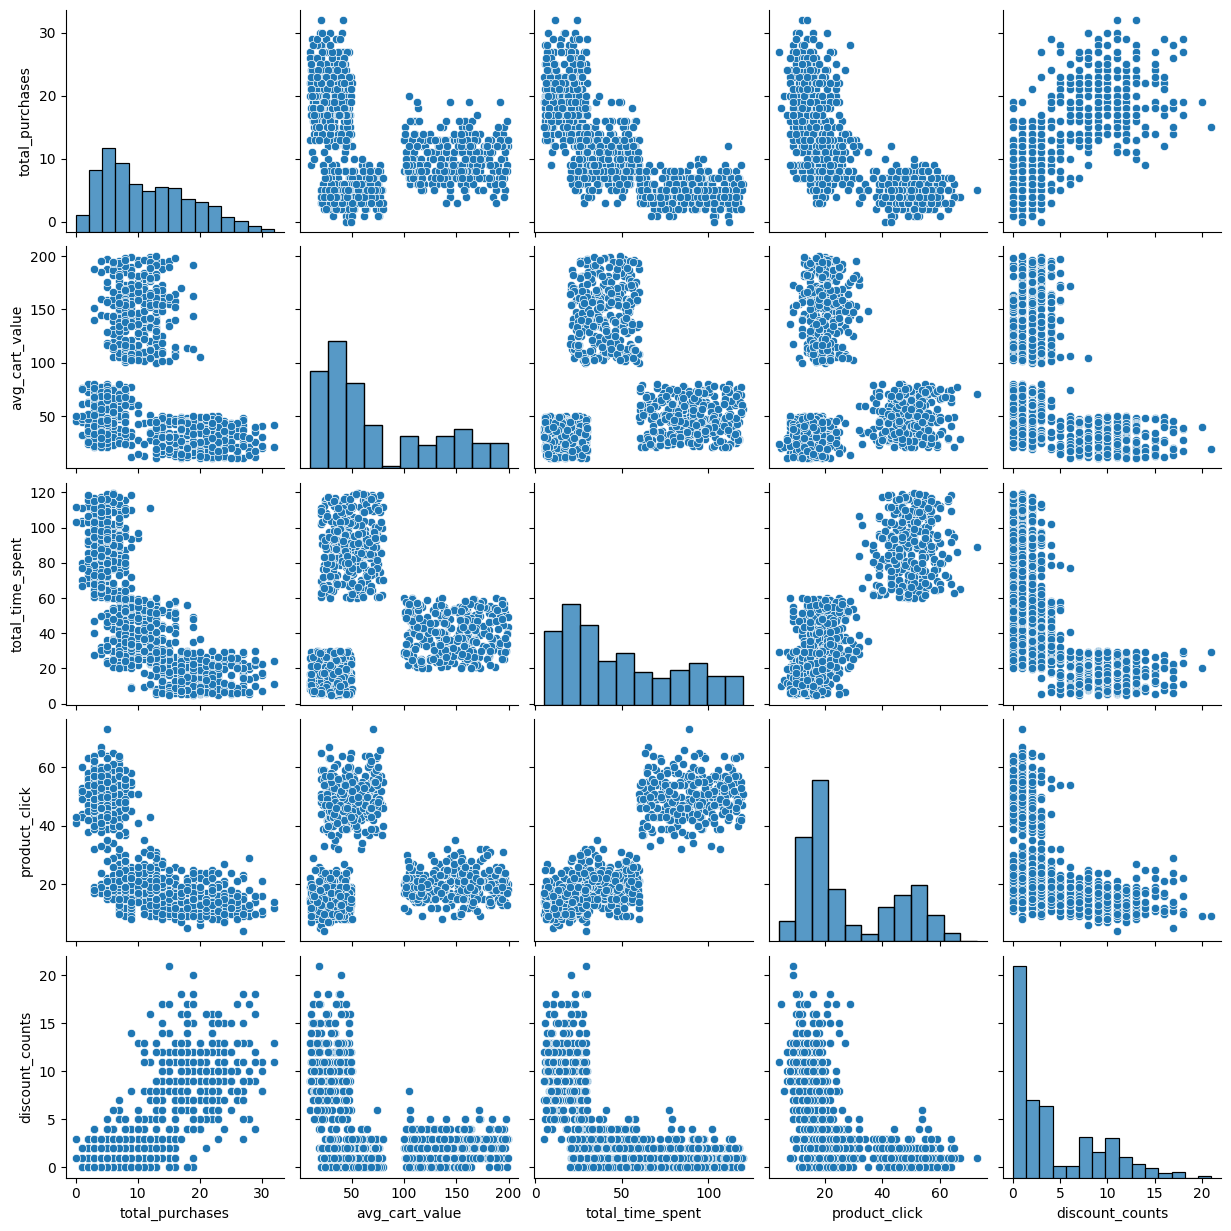

In [44]:
#visualizing the data
sns.pairplot(data.drop('customer_id', axis=1))
plt.show()

In [57]:
# Check for missing values
print(data.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
cluster             0
dtype: int64


In [58]:
# Fill missing values with the mean of each column
data = data.fillna(data.mean())

In [62]:
# Verify that there are no missing values
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
cluster             0
dtype: int64


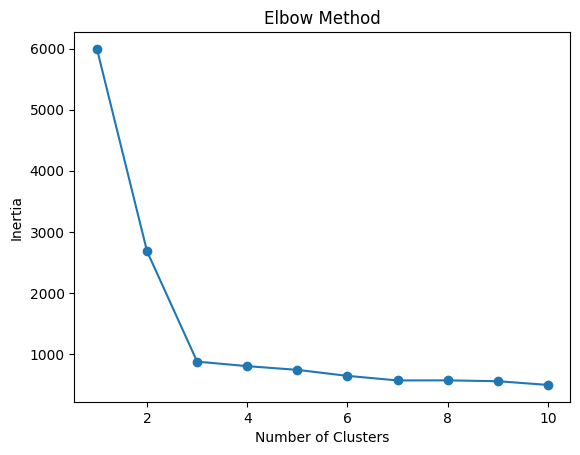

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts  cluster  
0              0.0        0  
1              7.0        1  
2              2.0        2  
3             10.0        1  
4              3.0        0  
Silhouette Score: 0.6641390196697337


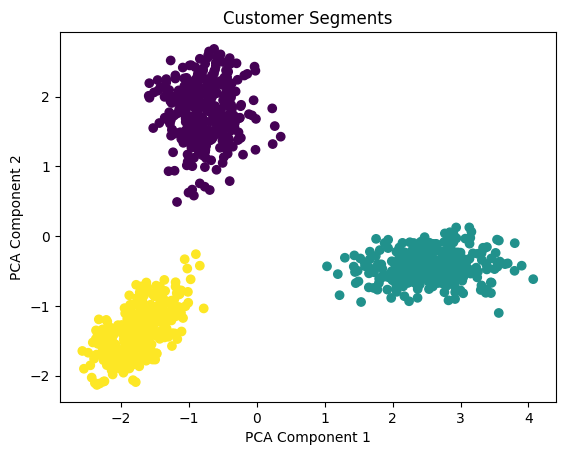

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.212991      145.390574         40.472126      20.120186   
1              19.540531       31.346684         17.511682      15.224222   
2               4.943626       49.348259         90.211837      49.457687   

         discount_counts  
cluster                   
0               1.940120  
1               9.969970  
2               1.027108  


In [64]:
# Normalize/Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['cluster'] = clusters
print(data.head())

# Evaluate the model using Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {score}')

# Visualize the clusters using PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Analyze the clusters
cluster_analysis = data.groupby('cluster').mean()
print(cluster_analysis)

In [70]:
def interpret_clusters(cluster_analysis):
    for cluster in cluster_analysis.index:
        total_purchases = cluster_analysis.loc[cluster, 'total_purchases']
        avg_cart_value = cluster_analysis.loc[cluster, 'avg_cart_value']
        total_time_spent = cluster_analysis.loc[cluster, 'total_time_spent']
        product_click = cluster_analysis.loc[cluster, 'product_click']
        discount_count = cluster_analysis.loc[cluster, 'discount_counts']
        
        
        if (total_purchases > 40 and avg_cart_value < 30 and discount_count > 10):
            print(f"Cluster {cluster}: Bargain Hunters")
        elif (avg_cart_value > 80 and discount_count < 10):
            print(f"Cluster {cluster}: High Spenders")
        elif (total_purchases < 20 and total_time_spent > 200 and product_click > 300):
            print(f"Cluster {cluster}: Window Shoppers")
        else:
            print(f"Cluster {cluster}: Unknown Segment")

# Call the function
interpret_clusters(cluster_analysis)

Cluster 0: High Spenders
Cluster 1: Unknown Segment
Cluster 2: Unknown Segment
